# Chi Square Tests

https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

This is recreating the tutorial from the above link.

### Notes

Chi Square determines if there is a significant difference between the expected distribution (null model) and the actual distribution (observations). 

Chi Square is for counting frequencies of categorical data. Think of die rolls, we expect that each number on the die should come up about 1/6th of the time. This would be the definition of a fair die. This would be especially true if we rolled the die 1,000 times we would expect a fair die to mirror this frequency distribution.

In [1]:
from random import randint
rolls = 1000

frequency = [randint(1,6) for i in range(rolls)]

In [2]:
import pandas as pd
import numpy as np

In [3]:
s = pd.Series(frequency)

In [4]:
df = pd.DataFrame(dict(s.value_counts()), index=[0], columns=[1,2,3,4,5,6])

In [5]:
df/df.T.sum()[0]

,1,2,3,4,5,6
0,0.175,0.186,0.161,0.167,0.154,0.157


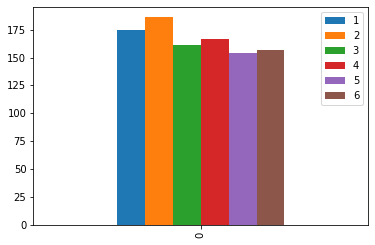

In [6]:
df.plot(kind='bar')

### Known vs Unknown Distributions

For die rolls we know what the _expected distribution_ is. However, there are some cases where we don't and instead our expected distribution is estimated through data. 

For this example, let's assume we don't know what the expected frequency of die rolls.

In [7]:
samples = {'a': [6,8,5,4,5,7],
           'b': [4,5,4,11,8,3],
           'c': [5,3,8,7,7,5],
           'd': [10, 3, 4, 13, 6,9]}

In [8]:
df_die = pd.DataFrame(data=samples, index=['one', 'two', 'three',
                                           'four', 'five', 'six'])

In [9]:
# Adding Total Distribution
df_die['total_dist'] = df_die.sum(axis=1)

In [10]:
# Quick Preview
df_die

,a,b,c,d,total_dist
one,6,4,5,10,25
two,8,5,3,3,19
three,5,4,8,4,21
four,4,11,7,13,35
five,5,8,7,6,26
six,7,3,5,9,24


In [11]:
# Adding Table Column Totals
df_die = df_die.append(pd.DataFrame({'total_rolls': df_die.sum(axis=0).values}, index=['a','b','c','d','total_dist']).T)

In [12]:
df_die

,a,b,c,d,total_dist
one,6,4,5,10,25
two,8,5,3,3,19
three,5,4,8,4,21
four,4,11,7,13,35
five,5,8,7,6,26
six,7,3,5,9,24
total_rolls,35,35,35,45,150


In [13]:
# Here Chi Square tests for independence b/t variables.
dataset = []
# excludes column grand totals
for x in df_die.values[:-1]:
    # Excludes total_dist
    dataset.append(x[:4])

dice = np.array(dataset)

In [14]:
from scipy import stats

In [15]:
stats.chi2_contingency(dice)

(16.490612061288754,
 0.35021521809742745,
 15,
 array([[ 5.83333333,  5.83333333,  5.83333333,  7.5       ],
        [ 4.43333333,  4.43333333,  4.43333333,  5.7       ],
        [ 4.9       ,  4.9       ,  4.9       ,  6.3       ],
        [ 8.16666667,  8.16666667,  8.16666667, 10.5       ],
        [ 6.06666667,  6.06666667,  6.06666667,  7.8       ],
        [ 5.6       ,  5.6       ,  5.6       ,  7.2       ]]))

In [16]:
print(f"Chi Square Stat: {stats.chi2_contingency(dice)[0]}")
print(f"P-Value {stats.chi2_contingency(dice)[1]}")
# Degrees of Freedom Row_Num-1 * Col_Num-1
print(f"Degrees of Freedom: {stats.chi2_contingency(dice)[2]}")
print(f"Contingency Table: \n{stats.chi2_contingency(dice)[3]}")

Chi Square Stat: 16.490612061288754
P-Value 0.35021521809742745
Degrees of Freedom: 15
Contingency Table: 
[[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]


In [17]:
# Manual Degree of Freedom calc
(dice.shape[0]-1) * (dice.shape[1]-1)

15

In [87]:
# This needs a function

def chi_square_pretty(array, prob=0.95):
    arr = stats.chi2_contingency(array)
    critical = stats.chi2.ppf(prob, arr[2])
    
    print(f"Chi Square Stat: {arr[0]}\n")
    print(f"Critical Value: {critical}\n")
    print(f"P-Value {arr[1]}\n")
    # Degrees of Freedom Row_Num-1 * Col_Num-1
    print(f"Degrees of Freedom: {arr[2]}\n")
    print(f"Contingency Table: \n\n{arr[3]}\n\n")
    h0 = ''
    if abs(arr[0]) >= critical:
        print('Dependent (reject H0)')
        h0 = 'Reject H0'
    else:
        print('Independent (fail to reject H0)')
        h0 = 'fail to reject H0'
    return pd.DataFrame(arr[3], columns=[i for i in range(1,arr[3].shape[1]+1)], index=[i for i in range(arr[3].shape[0])]), critical, h0

In [88]:
chi_square_pretty(dice)

Chi Square Stat: 16.490612061288754

Critical Value: 24.995790139728616

P-Value 0.35021521809742745

Degrees of Freedom: 15

Contingency Table: 

[[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]


Independent (fail to reject H0)


(          1         2         3     4
 0  5.833333  5.833333  5.833333   7.5
 1  4.433333  4.433333  4.433333   5.7
 2  4.900000  4.900000  4.900000   6.3
 3  8.166667  8.166667  8.166667  10.5
 4  6.066667  6.066667  6.066667   7.8
 5  5.600000  5.600000  5.600000   7.2,
 24.995790139728616,
 'fail to reject H0')

### p-value

Here, the p-value is where we will determine significance (aka 
independence). Typically, you look for a threshold of 0.05 or 0.01.
If our test is significant, we reject the null hypothesis (that the
variables are indepedent) meaning the variables are depedent.

Here, let's use 0.01. We reject the null hypothesis in this case because the p-value is 0.35. The contingency table shows us an output 
of the expected values. Here, they are off because our sample was too small and it is not representative of the population.

Let's do a bigger sample.

In [109]:
my_rolls_expected = [46.5, 46.5, 46.5, 46.5, 46.5, 46.5]
my_rolls_actual =  [59, 63, 37, 38, 32, 50]
stats.chisquare(my_rolls_actual, my_rolls_expected)

Power_divergenceResult(statistic=17.49462365591398, pvalue=0.003651257113910144)

In [23]:
opp_rolls_expected = [50.5,50.5,50.5,50.5,50.5,50.5]
opp_rolls_actual =  [39,39,46,54,53,72]
stats.chisquare(opp_rolls_actual, opp_rolls_expected)

Power_divergenceResult(statistic=15.158415841584159, pvalue=0.009706469571756566)

## ML Application

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

A common problem in ML is determining whether input features are relevant to the target variable / outcome to be predicted. This is a _feature selection_ problem.

If the input variable is also categorical, we can use statistical tests to see if the output variable is dependent or independent of the input variables.



#### Contingency Table

This is essentially a frequency table for categorical variables for a set of labels. Requires two categorical variables. The name originates from Pearson who wanted to determine whether one variable is contingent upon or depends upon the other variable. 

#### Pearson's Chi-Squared Test

Chi Square test is a _statistical hypothesis test_ that assumes (h0) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. 

Chi = X pronounced "ki". 

Main idea: Observed frequencies match expected frequencies.
1. Calculate expected frequencies
2. Determine if observed frequencies match expected frequencies.

* h0 = Observed and expected are the same.

When they are similar the p-value is large (independent). When the p-value is small they are dependent. X^2 does give a measure of distance between observed and expected frequencies. 

##### Degrees of Freedom: 
* If __statistic >= critical value__: _Significant, reject H0, dependent._
* If __statistic <= critical value__: _Not Significant, fail to reject H0, independent._

DoF is calculated using the size of the table:
(Row_Num - 1) * (Col_Num - 1) = Dof



In [240]:
# Stores result of whether X^2 test was accepted or rejected
h0_results = []

for j in range(20):
    bigger_data = []
    for i in range(5):
        bigger_data.append(np.unique(np.random.randint(1,7,10000), return_counts=True)[1])

    bigger_data = np.array(bigger_data)
    h0_results.append(chi_square_pretty(bigger_data, .95)[2])

Chi Square Stat: 18.52166464972683

Critical Value: 31.410432844230918

P-Value 0.5530847474070086

Degrees of Freedom: 20

Contingency Table: 

[[1659.2 1696.4 1656.2 1648.8 1672.8 1666.6]
 [1659.2 1696.4 1656.2 1648.8 1672.8 1666.6]
 [1659.2 1696.4 1656.2 1648.8 1672.8 1666.6]
 [1659.2 1696.4 1656.2 1648.8 1672.8 1666.6]
 [1659.2 1696.4 1656.2 1648.8 1672.8 1666.6]]


Independent (fail to reject H0)
Chi Square Stat: 16.143195065854396

Critical Value: 31.410432844230918

P-Value 0.7077018555674461

Degrees of Freedom: 20

Contingency Table: 

[[1660.8 1665.4 1662.2 1667.8 1665.4 1678.4]
 [1660.8 1665.4 1662.2 1667.8 1665.4 1678.4]
 [1660.8 1665.4 1662.2 1667.8 1665.4 1678.4]
 [1660.8 1665.4 1662.2 1667.8 1665.4 1678.4]
 [1660.8 1665.4 1662.2 1667.8 1665.4 1678.4]]


Independent (fail to reject H0)
Chi Square Stat: 32.33933160640615

Critical Value: 31.410432844230918

P-Value 0.039814068200444454

Degrees of Freedom: 20

Contingency Table: 

[[1646.  1656.2 1686.8 1673.4 1655.2 1682.

In [241]:
# Failing to reject indicates independence whereas rejecting means
# dependence.
h0_results


['fail to reject H0',
 'fail to reject H0',
 'Reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0',
 'fail to reject H0']

In [242]:
# Stores result of whether X^2 test was accepted or rejected
data = []

for j in range(10000):
    bigger_data = []
    for i in range(5):
        bigger_data.append(np.unique(np.random.randint(1,7,1000), return_counts=True)[1])

    bigger_data = np.array(bigger_data)
    data.append(stats.chi2_contingency(bigger_data)[0])
    
print(stats.chi2_contingency(bigger_data))

(30.754430703005184, 0.058516969391599644, 20, array([[170.8, 167.6, 165.2, 164.8, 161.6, 170. ],
       [170.8, 167.6, 165.2, 164.8, 161.6, 170. ],
       [170.8, 167.6, 165.2, 164.8, 161.6, 170. ],
       [170.8, 167.6, 165.2, 164.8, 161.6, 170. ],
       [170.8, 167.6, 165.2, 164.8, 161.6, 170. ]]))


In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Docs related to generating a chi2 plot.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

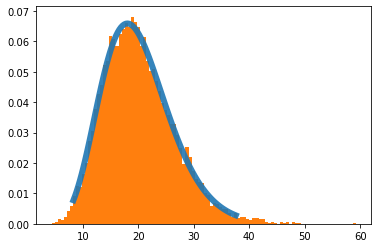

In [252]:
fig, ax = plt.subplots(1,1)

# PPF - Percent Point Function 
# (inverse of cdf [cumulative density function] percentiles)
x = np.linspace(stats.chi2.ppf(0.01, 20), 
                stats.chi2.ppf(0.99, 20), 100)

# Probability Density Plot for df=20
ax.plot(x, stats.chi2.pdf(x, 20), lw=6, alpha=.9, label='chi2 pdf')

# Histogram of chi2 stats
ax.hist(data, label='chi', bins=100, density=True)
plt.show()